---
title: Standard Errors and Intervals in Linear Regression
---

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In Lecture 2, we fit some simple linear regression models to the CPI data from FRED (https://fred.stlouisfed.org/series/CPIAUCSL). Here is the dataset.

In [26]:
## Inflation (Consumer Price Index)
cpi = pd.read_csv('CPIAUCSL_01September2025.csv')
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])
cpi.set_index('observation_date', inplace = True)
print(cpi)

                  CPIAUCSL
observation_date          
1947-01-01          21.480
1947-02-01          21.620
1947-03-01          22.000
1947-04-01          22.000
1947-05-01          21.950
...                    ...
2025-03-01         319.615
2025-04-01         320.321
2025-05-01         320.580
2025-06-01         321.500
2025-07-01         322.132

[943 rows x 1 columns]


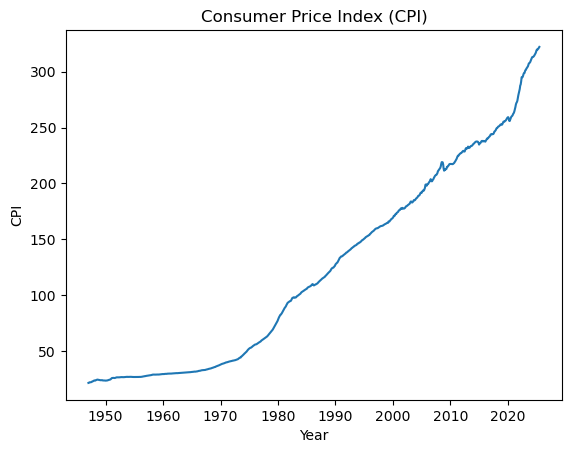

In [27]:
plt.plot(cpi.index, cpi['CPIAUCSL'], label='CPI')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('Consumer Price Index (CPI)')
plt.show()

We fit a simple linear regression model to this dataset with $y$ being the logarithm of CPI and $x$ being time:
\begin{equation*}
  y_i = \log(\text{CPI}_i) = \beta_0 + \beta_1 x_i + \epsilon_i
\end{equation*}
where $x_i = i$. We saw that we can interpret $100 \times \beta_1$ as the **percent change** in CPI from one month to the next. If we want the percent change for one year (as opposed to one month), we can look at $12 \times 100 \times \beta_1$. This number can be taken to represent an estimate of the historical inflation rate. 

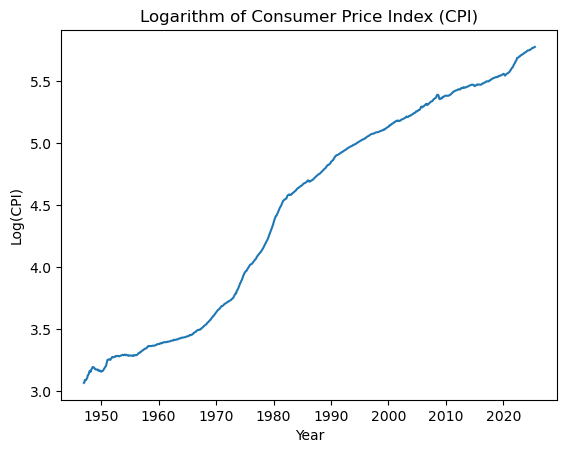

In [28]:
#Below we plot the log CPI as a function of time:
plt.plot(cpi.index, np.log(cpi['CPIAUCSL']), label='Logarithm of CPI')
plt.xlabel('Year')
plt.ylabel('Log(CPI)')
plt.title('Logarithm of Consumer Price Index (CPI)')
plt.show()

The linear regression model is fitted to the data as follows. 

In [29]:
y = np.log(np.array(cpi['CPIAUCSL']))
n = cpi.shape[0]
X = np.column_stack((np.ones(n), np.arange(n)))
linreg = sm.OLS(y, X).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.695e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:28:35   Log-Likelihood:                 385.22
No. Observations:                 943   AIC:                            -766.4
Df Residuals:                     941   BIC:                            -756.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9890      0.010    285.290      0.0

The parameter estimates, their standard errors, as well as confidence intervals can be obtained from the regression output as follows. 

In [30]:
print(linreg.params) #these are the betahats (least squares estimates)
print(linreg.bse) #these are the standard errors of the betahats
print(linreg.conf_int(alpha=0.05)) #these are the 95%

[2.98903025 0.0031618 ]
[1.04771516e-02 1.92591769e-05]
[[2.96846896 3.00959154]
 [0.003124   0.00319959]]


We can obtain these manually using the formulae that we derived and check if we are getting exactly the same answers. 

In [31]:
#For betahat: 
betahat = np.linalg.inv(X.T @ X) @ X.T @ y
print(betahat)
#For standard errors:
residuals = y - X @ betahat
sigma2hat = (residuals.T @ residuals) / (n - X.shape[1])
var_betahat = sigma2hat * np.linalg.inv(X.T @ X)
se_betahat = np.sqrt(np.diag(var_betahat))
print(se_betahat)
#For confidence intervals:
from scipy.stats import t
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df=n - X.shape[1]) #this computes t_{df, 1-alpha/2}
conf_int_lower = betahat - t_critical * se_betahat
conf_int_upper = betahat + t_critical * se_betahat
conf_int = np.column_stack((conf_int_lower, conf_int_upper))
print(conf_int)

[2.98903025 0.0031618 ]
[1.04771516e-02 1.92591769e-05]
[[2.96846896 3.00959154]
 [0.003124   0.00319959]]


## Nonlinear Regression

Consider the following dataset (from FRED) on Annual Estimates of the Resident Population of California (units are thousands of persons) from 1900 to 2024. 

  observation_date   CAPOP
0       1900-01-01  1490.0
1       1901-01-01  1550.0
2       1902-01-01  1623.0
3       1903-01-01  1702.0
4       1904-01-01  1792.0
5       1905-01-01  1893.0
6       1906-01-01  1976.0
7       1907-01-01  2054.0
8       1908-01-01  2161.0
9       1909-01-01  2282.0
    observation_date      CAPOP
115       2015-01-01  38904.296
116       2016-01-01  39149.186
117       2017-01-01  39337.785
118       2018-01-01  39437.463
119       2019-01-01  39437.610
120       2020-01-01  39521.958
121       2021-01-01  39142.565
122       2022-01-01  39142.414
123       2023-01-01  39198.693
124       2024-01-01  39431.263


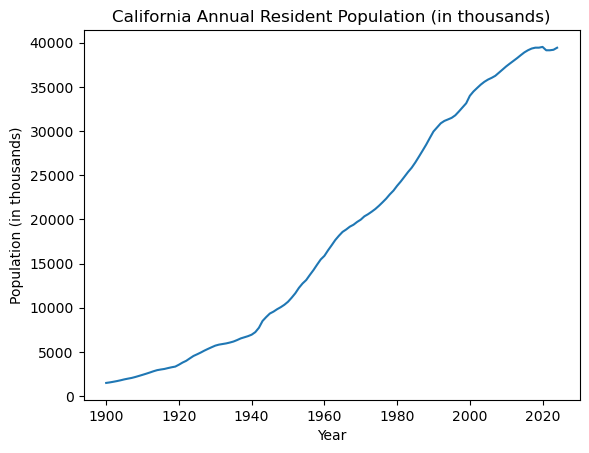

In [32]:
capop = pd.read_csv('CAPOP_11Sept2025.csv')
print(capop.head(10))
print(capop.tail(10))
tme = np.arange(1900, 2025)
plt.plot(tme, capop['CAPOP'], label='California Population')
plt.xlabel('Year')
plt.ylabel('Population (in thousands)')
plt.title('California Annual Resident Population (in thousands)')
plt.show()

Let us fit a basic regression model to this data. We shall work with the logarithms of the population data as this will lead to models with better interpretability. 

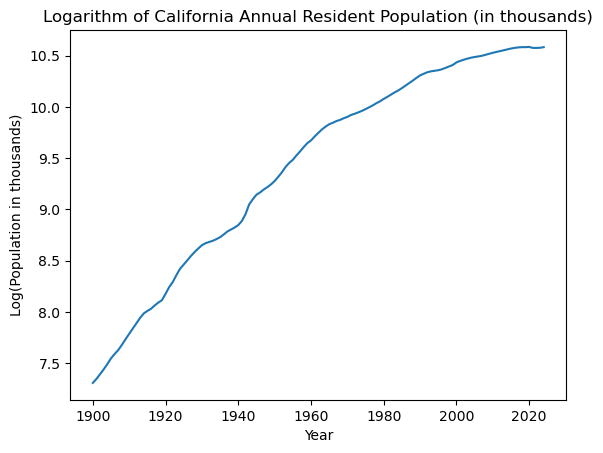

In [33]:
y = np.log(capop['CAPOP'])
n = len(y)
plt.plot(tme, y)
plt.xlabel('Year')
plt.ylabel('Log(Population in thousands)')
plt.title('Logarithm of California Annual Resident Population (in thousands)')
plt.show()

Let us first fit a simple linear regression model to this data. 

                            OLS Regression Results                            
Dep. Variable:                  CAPOP   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2343.
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           6.13e-82
Time:                        16:33:11   Log-Likelihood:                 10.482
No. Observations:                 125   AIC:                            -16.96
Df Residuals:                     123   BIC:                            -11.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7301      0.040    191.493      0.0

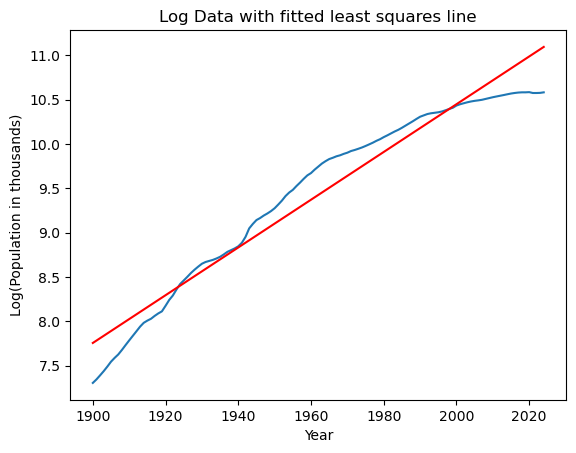

In [34]:
x = np.arange(1, n+1)
X = np.column_stack((np.ones(n), x))
linreg = sm.OLS(y, X).fit()
print(linreg.summary())
plt.plot(tme, y, label='Log(Population in thousands)')
plt.plot(tme, linreg.fittedvalues, color='red', label='Fitted least squares line')
plt.xlabel('Year')
plt.ylabel('Log(Population in thousands)')
plt.title('Log Data with fitted least squares line')
plt.show()

The fitted slope coefficient here is 0.0269. The interpretation is that the population increases by 2.69\% each year. 

From the above plot however, it is clear that the population growth rate is not 2.69\% uniformly. In the initial years, the growth rate seems to higher than 2.69\%, and in recent years, it seems to be lower. The simple linear regression model cannot pick up these variable growth rates. We can instead consider the following model: 
\begin{equation*}
  y_t = \beta_0 + \beta_1 t + \beta_2 (t - c)_+ + \epsilon_t
\end{equation*}
This model uses $\beta_1$ for the slope before $c$, and $\beta_1 + \beta_2$ for the slope after $c$. 

If $c$ is known, then this is again linear regression (now it is multiple linear regression as opposed to simple linear regression). However if $c$ is unknown, it becomes a nonlinear regression model. Our goal is to estimate $c$ as well as the coefficients $\beta_0, \beta_1, \beta_2$. 

In [35]:
def rss(c):
    x = np.arange(1, n+1)
    xc = ((x > c).astype(float))*(x - c)
    X = np.column_stack([np.ones(n), x, xc])
    md = sm.OLS(y, X).fit()
    rss = np.sum(md.resid ** 2)
    return rss

We compute $RSS(c)$ for each $c \in \{1, \dots, n\}$ as follows.

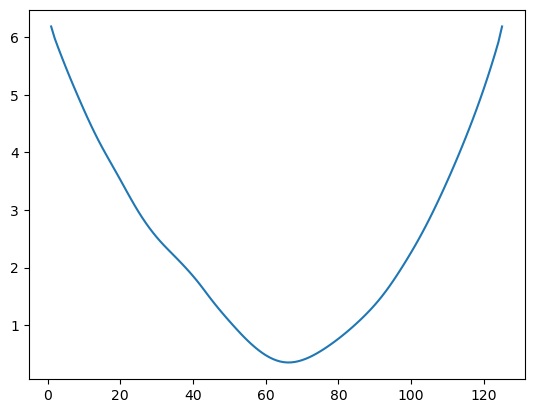

In [36]:
allcvals = np.arange(1, n+1) 
rssvals = np.array([rss(c) for c in allcvals])
plt.plot(allcvals, rssvals)
plt.show()

The estimate $\hat{c}$ is obtained by minimizing $RSS(c)$ as follows. 

In [37]:
c_hat = allcvals[np.argmin(rssvals)]
print(c_hat)
print(tme[c_hat - 1])

66
1965


Point estimates of the other parameters are obtained as follows. 

In [38]:
#Estimates of other parameters: 
x = np.arange(1, n+1)
c = c_hat
xc = ((x > c).astype(float))*(x-c)
X = np.column_stack([np.ones(n), x, xc])
md = sm.OLS(y, X).fit()
print(md.params) #this gives estimates of beta_0, beta_1, beta_2 
rss_chat = np.sum(md.resid ** 2)
sigma_mle = np.sqrt(rss_chat/n)
sigma_unbiased = np.sqrt((rss_chat)/(n-3))
print(np.array([sigma_mle, sigma_unbiased])) #sig is the true value of sigma which generated the data

const    7.367739
x1       0.038069
x2      -0.024040
dtype: float64
[0.05287982 0.05352604]


The estimate of $\hat{\beta}_1$ is 0.038 and the estimate of $\hat{\beta}_2$ is $-0.024$. This means that the growth rate before 1965 was 3.8\% while the growth rate after 1965 is $3.8 - 2.4 = 1.4$\%. 

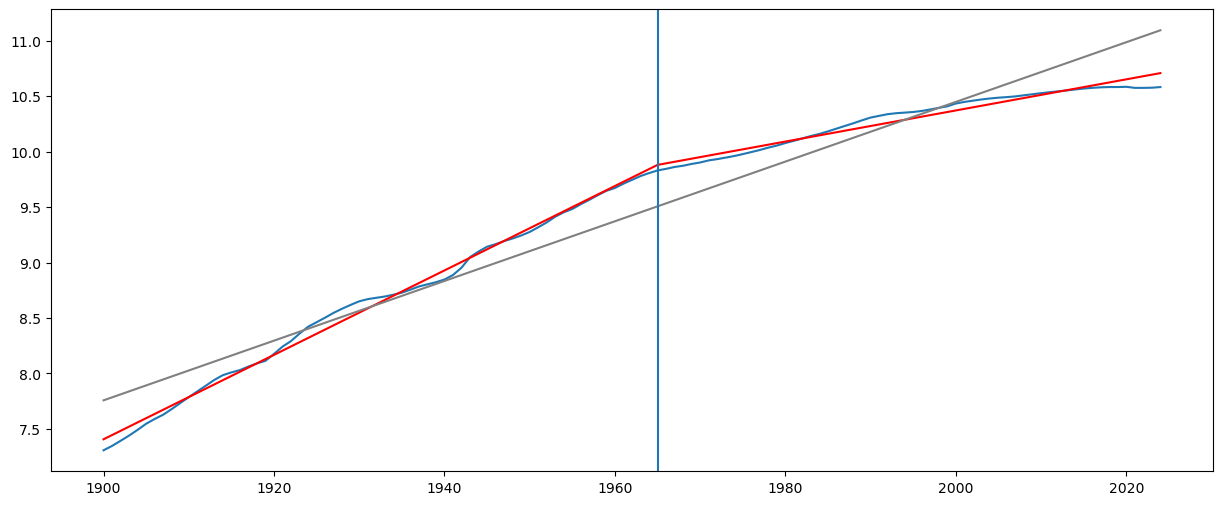

1965


In [39]:
#Plot fitted values
X_linmod = np.column_stack([np.ones(n), x])
linmod = sm.OLS(y, X_linmod).fit()
plt.figure(figsize = (15, 6))
#Plot this broken regression fitted values along with linear model fitted values 
plt.plot(tme, y)
plt.plot(tme, md.fittedvalues, color = 'red')
plt.plot(tme, linmod.fittedvalues, color = 'gray')
plt.axvline(tme[c_hat-1])
plt.show()
print(tme[c_hat-1])